In [1]:
import pandas as pd
import numpy as np

In [3]:
loans = pd.read_csv('../course_3_data/lending-club-data.csv')

/home/prachi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [5]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans',1)

In [6]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [7]:
loans = loans[features+[target]].dropna()

In [8]:
loans = pd.get_dummies(loans)

In [10]:
train_idx = pd.read_json('../course_3_data/module-8-assignment-1-train-idx.json')
valid_idx = pd.read_json('../course_3_data/module-8-assignment-1-validation-idx.json')

In [11]:
train_data = loans.iloc[train_idx[0]]
validation_data = loans.iloc[valid_idx[0]]

In [12]:
safe_loans_raw = loans[loans[target] == 1]
risky_loans_raw = loans[loans[target] == -1]

# Since there are less risky loans than safe loans, find the ratio of the sizes
# and use that percentage to undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
safe_loans = safe_loans_raw.sample(frac=percentage)
risky_loans = risky_loans_raw
loans_data = risky_loans.append(safe_loans)

print( "Percentage of safe loans                 :", len(safe_loans) / float(len(loans_data)))
print( "Percentage of risky loans                :", len(risky_loans) / float(len(loans_data)))
print( "Total number of loans in our new dataset :", len(loans_data))

Percentage of safe loans                 : 0.5
Percentage of risky loans                : 0.5
Total number of loans in our new dataset : 46294


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
model_5 = GradientBoostingClassifier(n_estimators=5,max_depth=6)

In [15]:
x = train_data.drop(target,1)
y = train_data[target]

In [17]:
model_5.fit(x,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
26,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
24,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
41,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [19]:
sample_validation_data[target]

22    1
26    1
24   -1
41   -1
Name: safe_loans, dtype: int64

In [21]:
model_5.predict(sample_validation_data.drop(target,1))

array([ 1,  1, -1,  1])

In [164]:
model_5.predict_proba(sample_validation_data.drop(target,1))

array([[0.41642331, 0.58357669],
       [0.46949689, 0.53050311],
       [0.53807792, 0.46192208],
       [0.39591639, 0.60408361]])

In [165]:
model_5.score(validation_data.drop(target,1), validation_data[target])

0.6613528651443343

In [166]:
len(validation_data[validation_data[target]==model_5.predict(validation_data.drop(target,1))])/len(validation_data)

0.6613528651443343

In [167]:
predict_safeloans = model_5.predict(validation_data.drop(target,1))

In [168]:
postive_false = sum(predict_safeloans>validation_data[target])

In [169]:
negative_false=sum(predict_safeloans<validation_data[target])

In [170]:
cost = 10000*negative_false + 20000*postive_false

In [171]:
cost

47970000

In [173]:
validation_data['predictions'] = model_5.predict_proba(validation_data.drop(target,1))[:,1]

<ipython-input-173-2bffae60f63d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['predictions'] = model_5.predict_proba(validation_data.drop(target,1))[:,1]


In [183]:
sort_postive_data = validation_data.sort_values('predictions',ascending=False)

In [184]:
sort_postive_data[sort_postive_data[target]==1].iloc[0:5,:]

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,predictions
34261,0.2,0,11,0.74,0.481601,0.0,1.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0,0.661468
68947,0.4,0,11,13.38,7.676000,0.0,1.0,3.0,1,1,...,0,0,0,0,0,0,0,0,0,0.661468
99626,0.4,0,11,2.08,3.825100,0.0,1.0,0.0,1,1,...,1,0,0,0,0,0,0,0,0,0.661468
69995,0.4,0,11,8.73,3.401080,0.0,1.0,4.0,1,1,...,0,0,0,0,0,0,0,0,0,0.661468
106446,0.6,0,3,4.76,1.687200,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0.661468


In [185]:
sort_negative_data = validation_data.sort_values('predictions',ascending=True)

In [186]:
sort_negative_data[sort_negative_data[target]==-1].iloc[0:5,:]

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,predictions
84508,0.8,1,1,7.37,16.62070,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0.307334
58794,0.8,0,2,8.66,17.62510,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0.307334
27502,1.0,0,3,8.53,14.62800,0.0,1.0,0.0,1,1,...,1,0,0,0,0,0,0,0,0,0.312806
114781,0.4,0,3,21.90,7.18760,1.0,0.0,4.0,0,1,...,0,0,0,0,0,0,0,0,0,0.315969
101746,0.2,0,11,11.21,4.23624,0.0,1.0,3.0,1,1,...,0,0,1,0,0,0,0,0,0,0.315969


In [187]:
model_10 = GradientBoostingClassifier(n_estimators=10,max_depth=6)
model_10.fit(x,y)

GradientBoostingClassifier(max_depth=6, n_estimators=10)

In [188]:
model_50 = GradientBoostingClassifier(n_estimators=50,max_depth=6)
model_50.fit(x,y)

GradientBoostingClassifier(max_depth=6, n_estimators=50)

In [189]:
model_100 = GradientBoostingClassifier(n_estimators=100,max_depth=6)
model_100.fit(x,y)

GradientBoostingClassifier(max_depth=6)

In [190]:
model_200 = GradientBoostingClassifier(n_estimators=200,max_depth=6)
model_200.fit(x,y)

GradientBoostingClassifier(max_depth=6, n_estimators=200)

In [191]:
model_500 = GradientBoostingClassifier(n_estimators=500,max_depth=6)
model_500.fit(x,y)

GradientBoostingClassifier(max_depth=6, n_estimators=500)

In [192]:
model_10.score(validation_data.drop([target,'predictions'],1), validation_data[target])

0.6664153382162861

In [193]:
model_50.score(validation_data.drop([target,'predictions'],1), validation_data[target])

0.6834338647134856

In [194]:
model_100.score(validation_data.drop([target,'predictions'],1), validation_data[target])

0.6894657475226196

In [195]:
model_200.score(validation_data.drop([target,'predictions'],1), validation_data[target])

0.6902197328737613

In [196]:
model_500.score(validation_data.drop([target,'predictions'],1), validation_data[target])

0.6893580353295993

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [217]:
train_err_10 = 1 - model_10.score(train_data.drop(target,1),train_data[target])
train_err_50 = 1 - model_50.score(train_data.drop(target,1),train_data[target])
train_err_100 = 1 - model_100.score(train_data.drop(target,1),train_data[target])
train_err_200 = 1 - model_200.score(train_data.drop(target,1),train_data[target])
train_err_500 = 1 - model_500.score(train_data.drop(target,1),train_data[target])

In [218]:
training_errors = [train_err_10, train_err_50, train_err_100, train_err_200, train_err_500]

In [219]:
validation_err_10 = 1 - model_10.score(validation_data.drop([target,'predictions'],1), validation_data[target])
validation_err_50 = 1 - model_50.score(validation_data.drop([target,'predictions'],1), validation_data[target])
validation_err_100 = 1 - model_100.score(validation_data.drop([target,'predictions'],1), validation_data[target])
validation_err_200 = 1 - model_200.score(validation_data.drop([target,'predictions'],1), validation_data[target])
validation_err_500 = 1 - model_500.score(validation_data.drop([target,'predictions'],1), validation_data[target])

In [220]:
validation_errors = [validation_err_10, validation_err_50, validation_err_100, validation_err_200, validation_err_500]


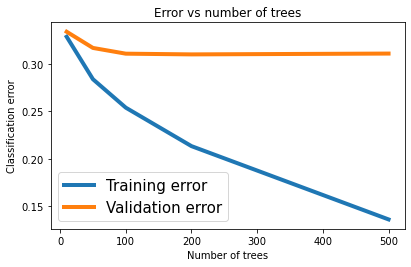

In [221]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(15,10), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')